# Airbnb Data Analysis and Price Prediction in Netherlands

This Python Notebook provides exciting insights about the Airbnb prices, room and property type, and Neighborhood areas in the Netharlands.</br></br>
The analysis is divided into the following steps:
<ol>
    <li><a href="#Sec1">Intoduction to the dataset</a></li>
    <li><a href="#Sec2">Exploratory Data Analysis</a></li>
    <li><a href="#Sec3">Obtaining Visual Insights</a></li>
    <li><a href="#Sec4">Imputing Missing Values</a></li>
    <li><a href="#Sec5">Using Dummy Variables for Categorical Features</a></li>
    <li><a href="#Sec6">Running Different Machine Learning Models</a></li>
    <ol type = 'a'>
        <li><a href="#Sec6a">Multiple Linear Regression on Prices</a></li>
        <li><a href="#Sec6b">Random Forest Regressor on Prices</a></li>
        <li><a href="#Sec6c">Multiple Linear Regression on Log(Prices)</a></li>
        <li><a href="#Sec6d">Random Forest Regressor on Log(Prices)</a></li>
    </ol>
    <li><a href="#Sec7">Conclusion</a></li>
    <li><a href="#Sec8">Further Analysis</a></li>
</ol>


## <a id="Sec1"> 1. Introduction to the dataset</a>
The data is obtained from Airbnb website (link: http://insideairbnb.com/get-the-data.html). We specifically use the listings data for the Netherlands in this data analysis project.
</br></br>

The main aim of this data is to model Airbnb prices when different parameters like room type, property type, neighbourhood area, host details, and several others are taken into account.
</br>
</br></br>

We first start with importing the required libraries and reading the dataset into a pandas Dataframe.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# !pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import linear_model

# !pip install xgboost
import xgboost
from xgboost import plot_importance

import geopandas
from shapely.geometry import Point, Polygon

In [2]:
# Reading the file and Loading it into a Dataframe

df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscach

## <a id="Sec2"> 2. Exploratory Data Analysis</a>

In [3]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.7+ MB


This dataframe has `106` parameters, which we will aim to remove most of them so that our model runs efficiently. It also has `20677` rows with datatypes float, int, and object.

In [4]:
df_listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,2.067700e+04,0.0,0.0,0.0,2.067700e+04,0.0,20665.000000,20665.000000,0.0,20677.000000,20677.000000,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000,17850.000000,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,2.019081e+13,NaN,NaN,NaN,5.666981e+07,NaN,7.010888,7.010888,NaN,52.365278,4.889565,2.879335,1.158580,1.454400,1.829213,548.435233,1.459351,3.546694,617.663297,3.516371,3.838129,602.894472,611.190937,3.653485,606.781022,3.783479,7.686173,12.423321,54.104609,23.290323,6.998597,94.97962,9.687283,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,7.800970e+00,NaN,NaN,NaN,6.812902e+07,NaN,37.729548,37.729548,NaN,0.016353,0.035970,1.314935,0.380091,0.894856,1.407580,555.655913,0.935662,18.690394,537.978553,18.688704,18.874855,538.915327,537.842556,18.759495,536.703416,7.219078,14.491902,22.936166,99.488601,48.619730,14.239550,6.63050,0.693180,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,2.019081e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,52.289270,4.753120,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,2.019081e+13,NaN,NaN,NaN,8.795077e+06,NaN,1.000000,1.000000,NaN,52.355130,4.863870,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,21.000000,2.000000,2.000000,20.000000,21.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,2.019081e+13,NaN,NaN,NaN,2.618942e+07,NaN,1.000000,1.000000,NaN,52.364620,4.887030,2.000000,1.000000,1.000000,1.000000,484.000000,1.000000,2.000000,1125.000000,2.000000,3.000000,1124.000000,1124.000000,2.300000,1124.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,97.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,2.019081e+13,NaN,NaN,NaN,7.754037e+07,NaN,2.000000,2.000000,NaN,52.375190,4.909260,4.000000,1.000000,2.000000,2.000000,861.000000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,4.000000,8.000000,13.000000,50.000000,23.000000,7.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,2.019081e+13,NaN,NaN,NaN,2.839422e+08,NaN,980.000000,980.000000,NaN,52.424710,5.027690,30.000000,15.000000,12.000000,32.000000,3229.000000,16.000000,1001.000000,1825.000000,1001.00

In [5]:
# Looking at the different data types in the dataframe

df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

On looking at some columns, we can conduct our first round of analysis without considering columns like different URLs, non-primary IDs, various textual columns, and unwanted host details

In [6]:
# Removing columns like URLs, free texts, and IDs (non primary) and setting index to 'id'

dead_cols = ['listing_url','scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview','notes','transit', 'access', 'interaction','house_rules','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications']
df_listings = df_listings.drop(dead_cols, axis=1)
df_listings.set_index('id', inplace=True)

We will now look at the histogram plots of the numerical data to gain better insights. Several categorical columns contain 't' and 'f' that denotes True and False respectively, which we can change to 1 and 0 respectively.

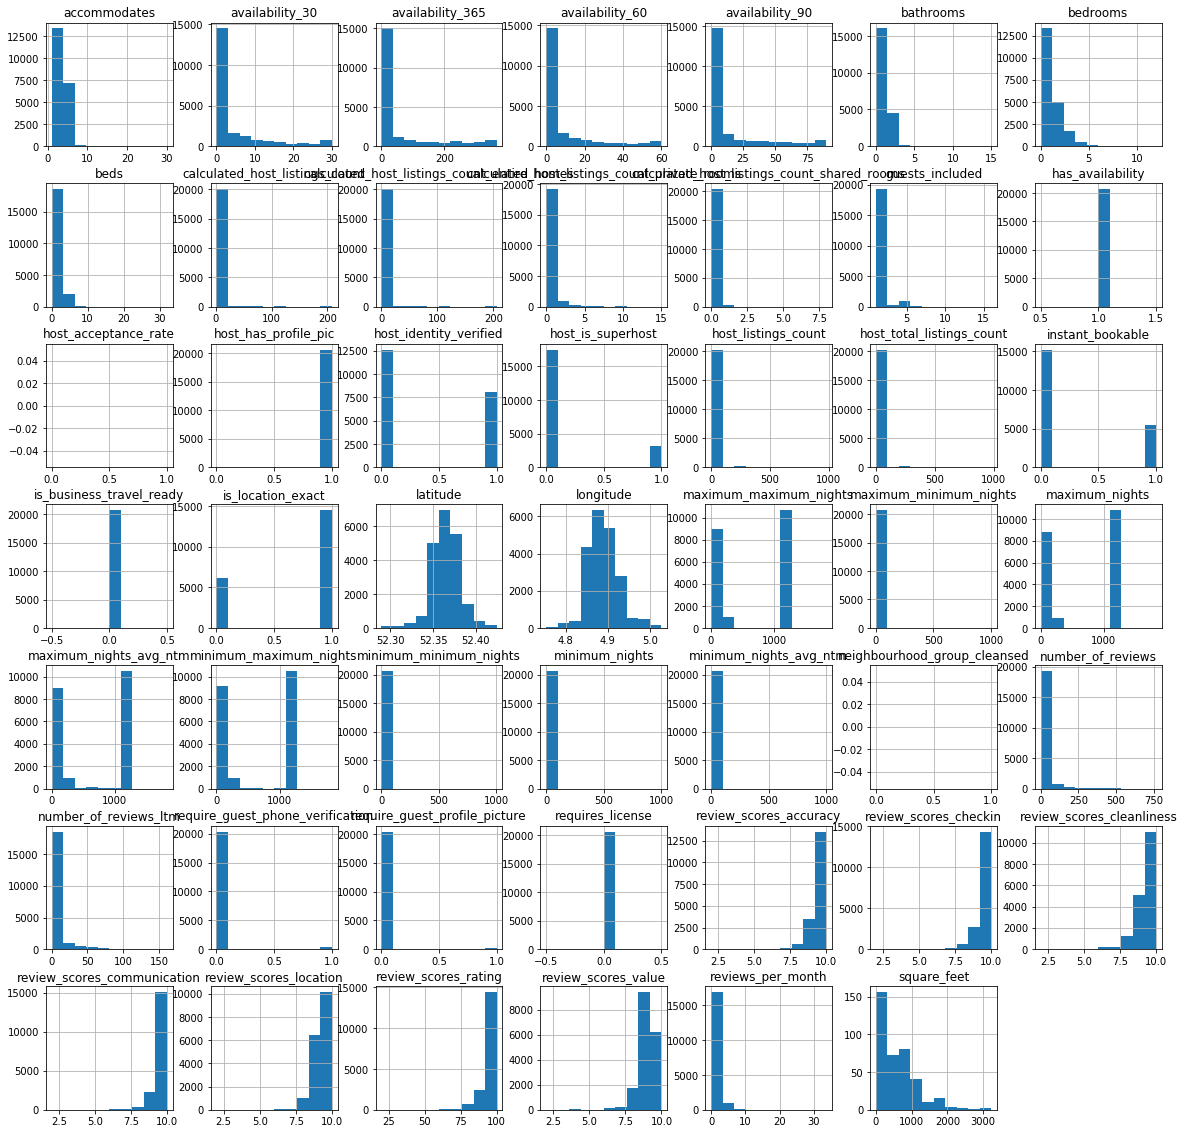

In [7]:
# Plotting histograms
df_listings.replace({'f': 0, 't':1}, inplace=True)

df_listings.hist(figsize=(20,20));

Some parameters either have singular values (like requires_licence) or even do not contain any information (like host_acceptance_rate). These columns are dropped.

Also, if we see the final predictor, price, is right skewed, which is why we will apply a logarithmic transformation to the column and compare the predicted prices and the logarithm of the predicted prices after transforming the column.

In [8]:
# Dropping single categorical or empty variables

df_listings.drop(['has_availability','host_acceptance_rate','host_has_profile_pic','is_business_travel_ready','maximum_maximum_nights','maximum_minimum_nights','minimum_maximum_nights','minimum_minimum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','neighbourhood_group_cleansed','require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [9]:
# Applying transformation to the price column

df_listings.price = df_listings.price.str.replace(r'$','')
df_listings.price = df_listings.price.str.replace(r',','')

df_listings.price = pd.to_numeric(df_listings['price'])

In [10]:
# Applying Logarithmic transformation to prices

df_listings['log_price'] = np.log1p(df_listings['price'])

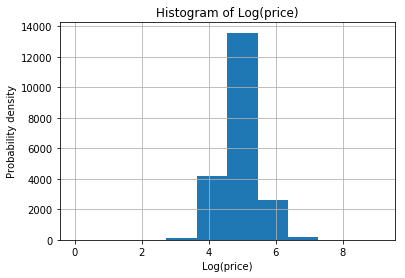

In [11]:
# Histogram of log(price)
fig, ax = plt.subplots()

df_listings.log_price.hist();

ax.set_xlabel('Log(price)')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Log(price)');

The log(price) now appears to be normally distributed. 

Note: The exploratory data analysis will be carried out using raw price column just to get the sense of the actual prices involved and we will lastly build models on both the price and log(price) columns and compare them.

In [12]:
df_listings.columns

Index(['experiences_offered', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       're

In [13]:
df_listings.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
count,20665.000000,20665.000000,20665.000000,20665.000000,20677.000000,20677.000000,20677.00000,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,17861.00000,17850.000000,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000,20677.000000
mean,0.155529,7.010888,7.010888,0.390177,52.365278,4.889565,0.69986,2.879335,1.158580,1.454400,1.829213,548.435233,159.078686,1.459351,3.546694,617.663297,3.783479,7.686173,12.423321,54.104609,23.290323,6.998597,94.97962,9.687283,9.469079,9.735762,9.789488,9.476124,9.177054,0.263626,4.925134,4.492431,0.410988,0.021715,0.987736,4.920900
std,0.362417,37.729548,37.729548,0.487802,0.016353,0.035970,0.45833,1.314935,0.380091,0.894856,1.407580,555.655913,162.464267,0.935662,18.690394,537.978553,7.219078,14.491902,22.936166,99.488601,48.619730,14.239550,6.63050,0.693180,0.867372,0.654358,0.610074,0.707655,0.808275,0.440610,22.883678,22.710906,1.082794,0.237805,1.349155,0.513980
min,0.000000,0.000000,0.000000,0.000000,52.289270,4.753120,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,52.355130,4.863870,0.00000,2.000000,1.000000,1.000000,1.000000,0.000000,99.000000,1.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.240000,4.605170
50%,0.000000,1.000000,1.000000,0.000000,52.364620,4.887030,1.00000,2.000000,1.000000,1.000000,1.000000,484.000000,130.000000,1.000000,2.000000,1125.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,97.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.540000,4.875197
75%,0.000000,2.000000,2.000000,1.000000,52.375190,4.909260,1.00000,4.000000,1.000000,2.000000,2.000000,861.000000,180.000000,2.000000,3.000000,1125.000000,4.000000,8.000000,13.000000,50.000000,23.000000,7.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.070000,5.198497
max,1.000000,980.000000,980.000000,1.000000,52.424710,5.027690,1.00000,30.000000,15.000000,12.000000,32.000000,3229.000000,8915.000000,16.000000,1001.000000,1825.000000,30.000000,60.000000,90.000000,365.000000,767.000000,161.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,208.000000,206.000000,15.000000,8.000000,33.670000,9.095603


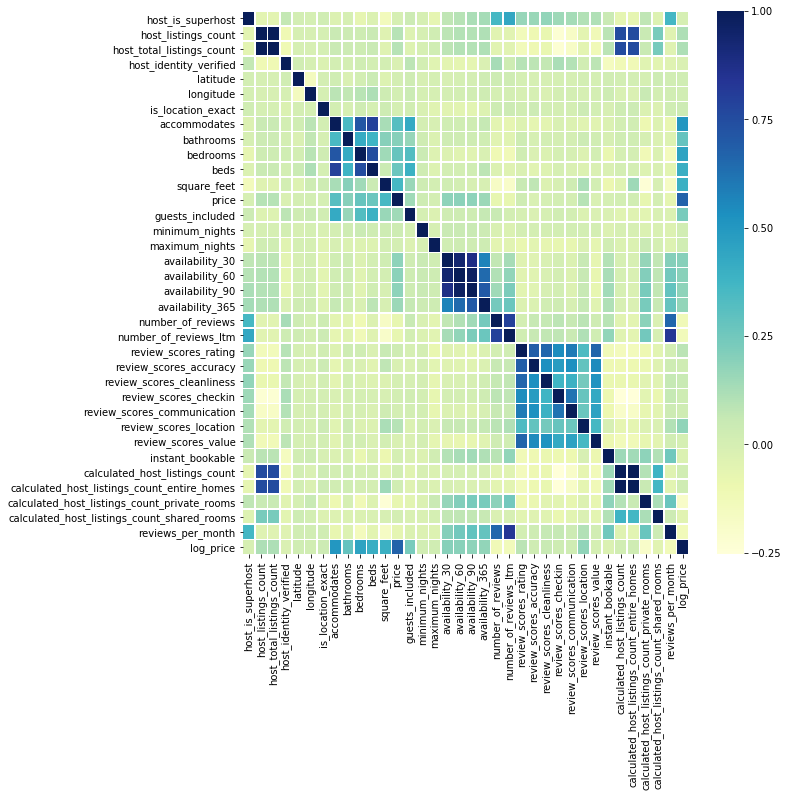

In [14]:
# Constructing heatmaps for the numerical columns
corr = df_listings.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        linewidths=.5,
        cmap="YlGnBu",
        ax=ax);

In [15]:
# Converting host_since object data type to datetime column and filling NAs with the earliest period.

df_listings.host_since = pd.to_datetime(df_listings.host_since)
df_listings['host_since_year'] = df_listings.host_since.dt.to_period('Y')

df_listings['host_since_year'] = df_listings['host_since_year'].fillna(df_listings['host_since'].min().year)

In [16]:
df_listings.iloc[0]

experiences_offered                                                                          none
host_name                                                                                  Daniel
host_since                                                                    2008-09-24 00:00:00
host_response_time                                                                 within an hour
host_response_rate                                                                           100%
host_is_superhost                                                                               1
host_listings_count                                                                             1
host_total_listings_count                                                                       1
host_identity_verified                                                                          0
street                                                      Amsterdam, North Holland, Netherlands
neighbourhood       

In [17]:
# Converting host_since_year to integer

df_listings.host_since_year = df_listings.host_since_year.astype(str)
df_listings.host_since_year = df_listings.host_since_year.astype(int)

We have now achieved some amount of data transformations for us to view some charts. We will first start with the maximum number of reviews that all the Airbnb listings received from `2008` to `2019`.

## <a id="Sec3"> 3. Obtaining Visual Insights</a>
Plotting Maximum reviews that all listing got over the years in Netherlands.

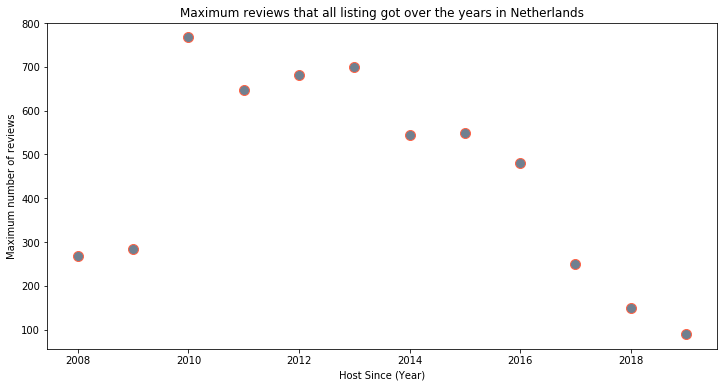

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

df_max_yearwise_reviews = pd.DataFrame(df_listings.groupby('host_since_year')['number_of_reviews'].max())
df_max_yearwise_reviews.reset_index().plot.scatter(x='host_since_year', y='number_of_reviews', s=100, ax=ax, c='#708090', linewidths = 1, edgecolors='#FF6347');

ax.set_xlabel('Host Since (Year)')
ax.set_ylabel('Maximum number of reviews')
ax.set_title('Maximum reviews that all listing got over the years in Netherlands');


We see that around `780` reviews were given in the year `2010` which was the year where maximum reviews were obtained. The lowest number of reviews were given in `2018` which were around `125`.

Note: The data set is a `2019` data set which means that there is a high chance that all reviews in `2019` were not included, which is why we assume that lowest number of maximum reviews were given in `2018`.

Now, we move to different room types for the entire dataset and plotting them.

In [19]:
# Finding different room types

df_listings.room_type.value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

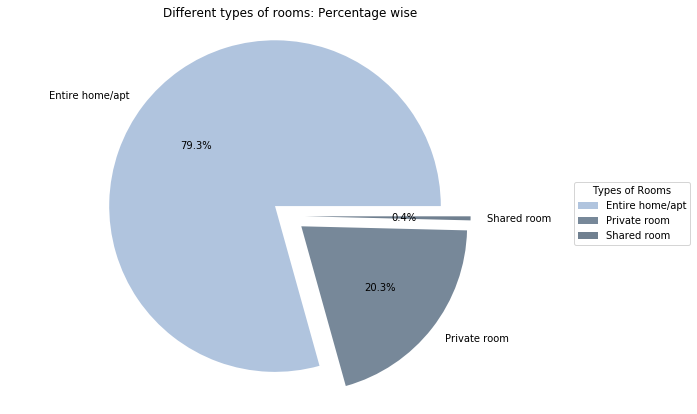

In [20]:
# Plotting different room types
fig, ax = plt.subplots(figsize=(10,7))

# sns.countplot(x='room_type', data=df_listings, palette='deep', order=df_listings['room_type'].value_counts().index, ax=ax);
labels = ['Entire home/apt', 'Private room', 'Shared room']
explode = (0.1,0.1,0.1)

colors = ['#B0C4DE','#778899','#708090']

wedges, texts, autotexts = ax.pie(df_listings.room_type.value_counts(), labels=labels, autopct = '%1.1f%%', explode=explode, shadow=False, colors=colors);
ax.axis('equal');

ax.legend(wedges, labels,
          title="Types of Rooms",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Different types of rooms: Percentage wise")

plt.show()

Most of the room types were Entire home/apartments, totalling to `79.3%` of the overall room types and on the contrary, only `0.4%` of the total room types were shared rooms.

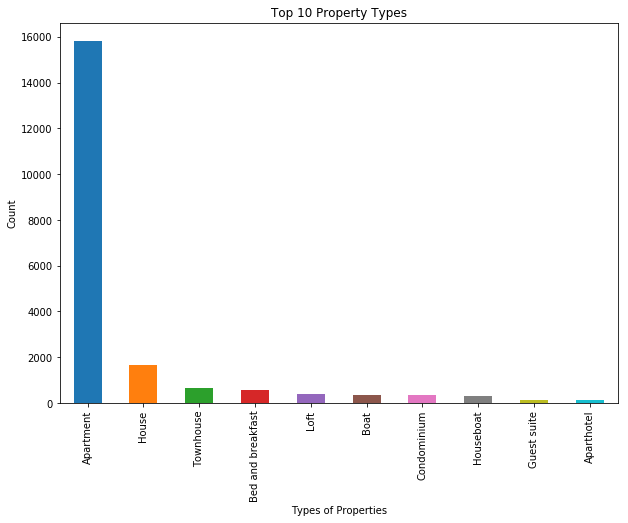

In [21]:
# Plotting top 10 property types
fig, ax = plt.subplots(figsize=(10,7))

df_listings.property_type.value_counts()[0:10].plot(kind='bar', ax=ax);
ax.set_xlabel('Types of Properties')
ax.set_ylabel('Count')
ax.set_title('Top 10 Property Types');

We see that Apartment property type is the most listed Airbnb property. 

Now, we will look into the listings in different neighbourhood areas.

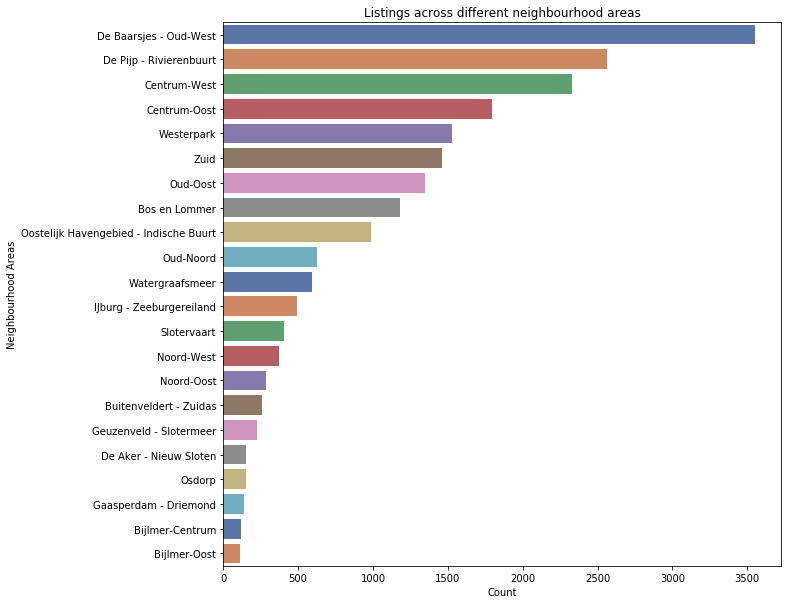

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(y='neighbourhood_cleansed', data=df_listings, palette='deep', order=df_listings['neighbourhood_cleansed'].value_counts().index, ax=ax);

ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhood Areas')
ax.set_title('Listings across different neighbourhood areas');

The top listings were in the `De Baarsjes - Oud-West`, `De Pijp - Rivierenbuurt`, and `Centrum-West` regions respectively.

This opens up more possibility for us to view the average prices and review ratings based on these regions.

In [23]:
# Average Prices and Ratings across different neighbourhood regions

pd.DataFrame(df_listings.groupby(['neighbourhood_cleansed'])['price','review_scores_rating'].mean())

,price,review_scores_rating
neighbourhood_cleansed,,
Bijlmer-Centrum,99.655172,93.011905
Bijlmer-Oost,92.008696,93.373737
Bos en Lommer,122.460169,95.253152
Buitenveldert - Zuidas,156.111538,93.873737
Centrum-Oost,203.086811,94.892053
Centrum-West,202.806271,94.220347
De Aker - Nieuw Sloten,134.097403,95.380165
De Baarsjes - Oud-West,148.131868,95.318850
De Pijp - Rivierenbuurt,162.860938,94.996853


We see that `Centrum-Oost` has the most average price amongst all the neighbourhood regions, which is also among the top 4 listings. On the other hand, `IJburg - Zeeburgereiland` region has the most average rated listings.

We can also plot the actual prices across the neighbourhood.

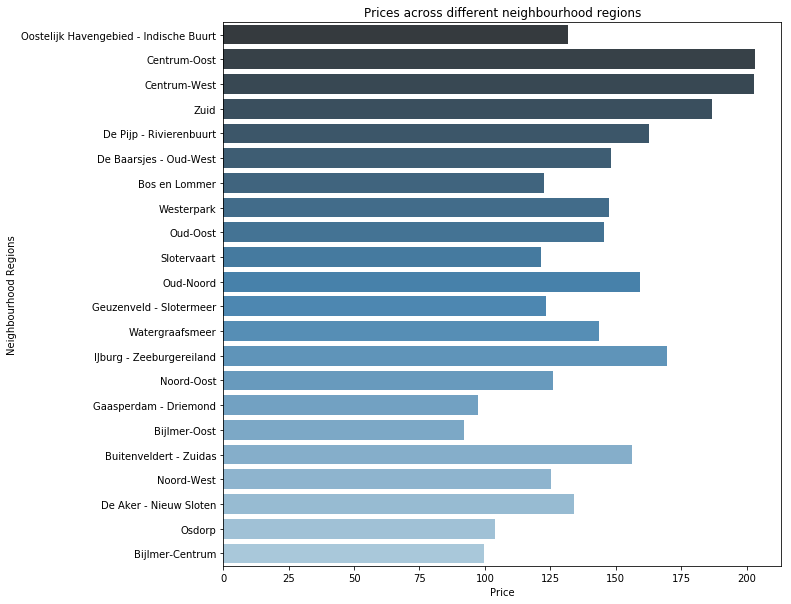

In [24]:
# Plotting actual prices across differnt neighbourhood regions

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='price', y='neighbourhood_cleansed', data=df_listings, palette='Blues_d', ax=ax, ci=None, orient='h');
ax.set_xlabel('Price')
ax.set_ylabel('Neighbourhood Regions')
ax.set_title('Prices across different neighbourhood regions');

The above graph also corresponds to the table discussed before.

Now, we will plot the (log) prices across different regions on a GeoPandas DataFrame.

In [25]:
df_map = df_listings[['latitude','longitude','host_name','host_is_superhost','price','availability_30','availability_60','availability_90','reviews_per_month','log_price']]

In [26]:
# df_listings.columns
df_map.head()

,latitude,longitude,host_name,host_is_superhost,price,availability_30,availability_60,availability_90,reviews_per_month,log_price
id,,,,,,,,,,
2818,52.36575,4.94142,Daniel,1.0,59.0,8,18,43,2.12,4.094345
20168,52.36509,4.89354,Alexander,0.0,80.0,0,8,34,2.46,4.394449
25428,52.37297,4.88339,Joan,0.0,125.0,4,6,16,0.16,4.836282
27886,52.38673,4.89208,Flip,1.0,150.0,6,13,26,2.11,5.017280
28871,52.36719,4.89092,Edwin,1.0,75.0,2,5,12,2.59,4.330733


### <a id="Sec3a">Map</a>

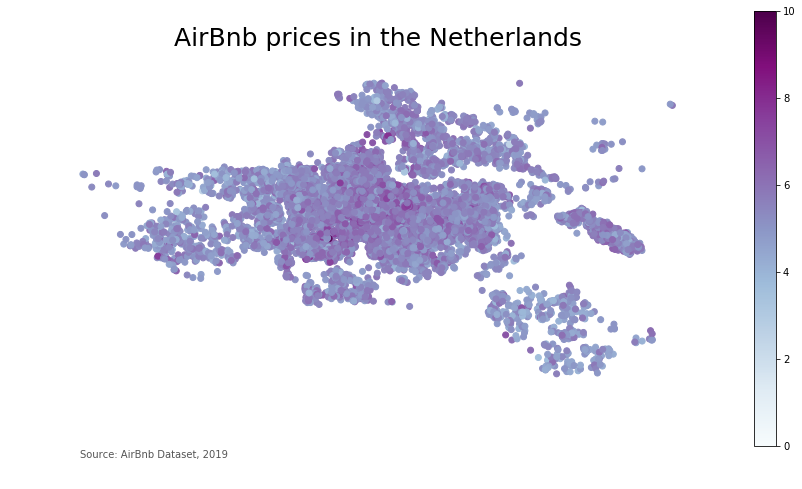

In [27]:
geometry = [Point(xy) for xy in zip(df_map.longitude, df_map.latitude)]
final_crs = {'init': 'epsg:28992'}

geodf = geopandas.GeoDataFrame(df_map, geometry=geometry, crs=final_crs)

fig, ax = plt.subplots(1, figsize=(15, 8))
variable = 'log_price'

ax.axis('off')
vmin=math.floor(geodf[variable].min())
vmax=math.ceil(geodf[variable].max())

sm=plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

fig.colorbar(sm)

# add a title
ax.set_title('AirBnb prices in the Netherlands', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: AirBnb Dataset, 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555');

geodf.plot(variable, ax=ax, cmap='BuPu', linewidth=1);


Now, lets plot different ratings after binning them into 3 sections: 
<ol>
    <li>Ratings between 0 and 79</li>
    <li>Ratings between 80 and 89</li>    
    <li>Ratings between 90 and 100</li>    
</ol>
After that, we plot the other ratings.

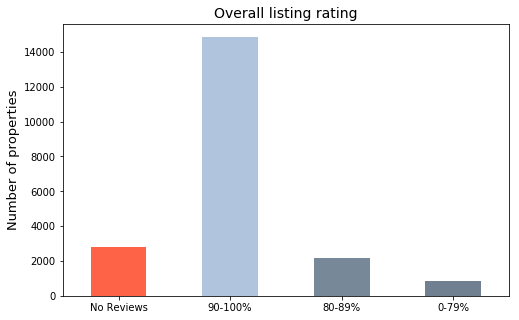

In [28]:
bins=[0, 80, 90, 100]
labels=['0-79', '80-89', '90-100']
df_listings_rating = pd.DataFrame()
df_listings_rating['review_scores_rating'] = pd.cut(df_listings['review_scores_rating'], bins=bins, labels=labels, include_lowest=True)
df_listings_rating['review_scores_rating'] = df_listings_rating['review_scores_rating'].astype('str')
df_listings_rating['review_scores_rating'].fillna('No Reviews', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)

df_listings_rating['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['#FF6347', '#B0C4DE','#778899','#708090' ], ax=ax)
ax.set_xticklabels(labels=['No Reviews', '90-100%', '80-89%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

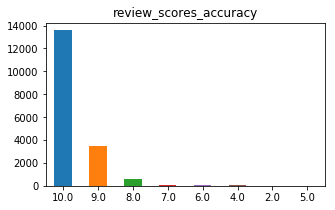

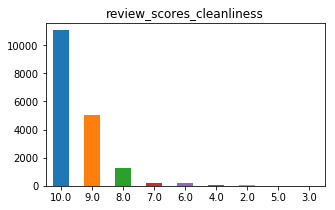

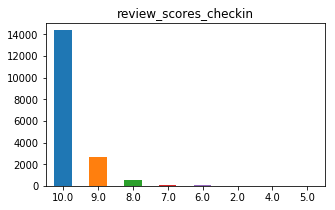

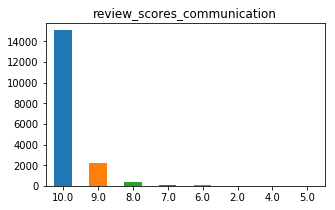

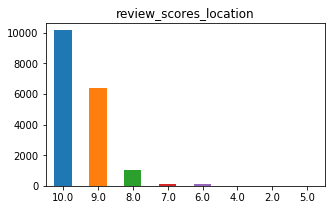

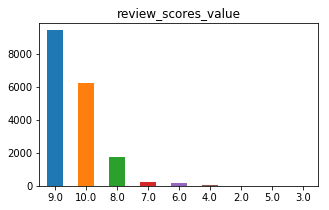

In [29]:
for col in list(df_listings.columns[(df_listings.columns.str.startswith("review_scores") == True) & (df_listings.columns !='review_scores_rating')]):
    df_listings[col].value_counts().plot(kind='bar', figsize=(5,3))
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

Most of the reviews are `10.0`.

## <a id="Sec4"> 4. Imputing the missing values</a>
We first divide the overall columns into numerical and categorical. Textual columns are not considered for our analysis. 
Impouting the numerical and categorical is done by obtaining the <b>mode</b> values for that column.

Apart from that, some text in the categorical or textual columns are replaced by an empty character for data cleaning. 
Finally, the textual columns are dropped and the overall dataframe is then merged.

In [30]:
# Considering int32, int64, float64, and datetime as numerical columns

df_numerical = df_listings.select_dtypes(include=['int64', 'float64','datetime64','int32']);
for col in df_numerical:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mode()[0])

In [31]:
# Considering all except int32, int64, float64, and datetime as categorical columns (currently includes objects and some numerical columns)

df_categorical = df_listings.select_dtypes(exclude=['int64', 'float64','datetime64[ns]','int32'],)

In [32]:
# Cleaning categorical columns

def clean_cat_columns(col):
    col=col.str.replace('[','')
    col=col.str.replace(']','')
    col=col.str.replace('{','')
    col=col.str.replace('}','')
    col=col.str.replace("'",'')
    col=col.str.replace('"','')
    col=col.str.replace('$','')
    col=col.str.replace('%','')
    return col

df_categorical = df_categorical[df_categorical.columns].apply(lambda col: clean_cat_columns(col));


for col in df_categorical:
    df_categorical[col] = df_categorical[col].fillna(df_categorical[col].mode()[0])

In [33]:
# Dropping textual columns, convering numerical columns into its true form after processing, and retaining categorical columns

drop_cols = ['experiences_offered','host_name','street','neighbourhood','city','state','zipcode','market','smart_location','country','country_code','amenities','weekly_price','monthly_price','security_deposit','calendar_updated','first_review','last_review','license','jurisdiction_names','calendar_last_scraped']
categorical_cols = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
num_cols = ['host_response_rate','cleaning_fee','extra_people']

df_categorical = df_categorical.drop(columns=drop_cols, axis=1)

for col in categorical_cols:
    df_categorical[col] = df_categorical[col].astype('category')
    
for col in num_cols:
    df_categorical[col] = df_categorical[col].astype('float')

In [34]:
# df_categorical.isnull().sum()
df_listings_cleaned = pd.concat([df_numerical, df_categorical], axis=1)

In [35]:
df_listings_cleaned.head()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,host_since_year,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,bed_type,cleaning_fee,extra_people,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,2008-09-24,1.0,1.0,1.0,0.0,52.36575,4.94142,0,2,1.5,1.0,2.0,0.0,59.0,1,3,15,8,18,43,89,267,30,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.12,4.094345,2008,within an hour,100.0,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,Real Bed,60.0,20.0,strict_14_with_grace_period
20168,2009-12-02,0.0,2.0,2.0,0.0,52.36509,4.89354,1,2,1.0,1.0,1.0,0.0,80.0,2,1,1000,0,8,34,124,283,67,88.0,9.0,10.0,10.0,10.0,10.0,9.0,0,2,0,2,0,2.46,4.394449,2009,within an hour,100.0,Centrum-Oost,Townhouse,Private room,Real Bed,50.0,0.0,strict_14_with_grace_period
25428,2009-11-20,0.0,2.0,2.0,0.0,52.37297,4.88339,0,3,1.0,1.0,1.0,0.0,125.0,2,14,60,4,6,16,75,3,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,2,0,0,0.16,4.836282,2009,within an hour,100.0,Centrum-West,Apartment,Entire home/apt,Real Bed,40.0,10.0,strict_14_with_grace_period
27886,2010-03-23,1.0,1.0,1.0,1.0,52.38673,4.89208,1,2,1.0,1.0,1.0,0.0,150.0,1,2,730,6,13,26,66,195,41,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,1,0,2.11,5.017280,2010,within an hour,100.0,Centrum-West,Houseboat,Private room,Real Bed,0.0,0.0,strict_14_with_grace_period
28871,2010-05-13,1.0,3.0,3.0,1.0,52.36719,4.89092,1,2,1.0,1.0,1.0,0.0,75.0,1,2,1825,2,5,12,138,283,99,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3,0,3,0,2.59,4.330733,2010,within an hour,100.0,Centrum-West,Apartment,Private room,Real Bed,50.0,0.0,moderate


In [36]:
df_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20677 entries, 2818 to 37590988
Data columns (total 47 columns):
host_since                                      20677 non-null datetime64[ns]
host_is_superhost                               20677 non-null float64
host_listings_count                             20677 non-null float64
host_total_listings_count                       20677 non-null float64
host_identity_verified                          20677 non-null float64
latitude                                        20677 non-null float64
longitude                                       20677 non-null float64
is_location_exact                               20677 non-null int64
accommodates                                    20677 non-null int64
bathrooms                                       20677 non-null float64
bedrooms                                        20677 non-null float64
beds                                            20677 non-null float64
square_feet                   

## <a id="Sec5"> 5. Using Dummy Variables for Categorical Features</a>
The final cleaned and merged dataset has `47` columns and `20677` non-null, all missing values imputed data which can be now used to run on models. However, we need to fix the categorical variables by using dummy variables. We do that in the next step.

In [37]:
hrt_dummy = pd.get_dummies(df_listings_cleaned['host_response_time'])
nc_dummy = pd.get_dummies(df_listings_cleaned['neighbourhood_cleansed'])
pt_dummy = pd.get_dummies(df_listings_cleaned['property_type'])
rt_dummy = pd.get_dummies(df_listings_cleaned['room_type'])
bt_dummy = pd.get_dummies(df_listings_cleaned['bed_type'])
cp_dummy = pd.get_dummies(df_listings_cleaned['cancellation_policy'])

drop_cols = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
df_listings_cleaned = df_listings_cleaned.drop(columns=drop_cols, axis=1)

df_listings_cleaned = pd.concat([df_listings_cleaned,hrt_dummy,pt_dummy,rt_dummy,bt_dummy,cp_dummy], axis=1)

## <a id="Sec6"> 6. Running Different Machine Learning Models</a>

We will now run the following Machine Learning Algorithms:
<ol>
    <li>Multiple Linear Regression</li>
    <li>Random Forest Regressor</li>
</ol>
<p>Both these models are first run on raw price column as the predictor variable and keeping the rest cleansed columns in the dataframe followed by the logarithmic price as the predictor. Their Training and Testing RMSEs will be compared.</p>
<p>We will also apply PCA on these models to obtain `p` predictors and compare the results on Training and Testing RMSEs.</p>

In [38]:
df_listings_cleaned = df_listings_cleaned.drop(['host_since'], axis=1)

### <a id="Sec6a">a. Multiple Linear Regression on Prices</a>

In [40]:
# Predicting Prices using Multiple Linear Regression
l_X, l_y = df_listings_cleaned.drop('price', axis=1), df_listings_cleaned['price'];

linear_reg = linear_model.LinearRegression()

# Using the 75-25% train-test split consistently with a random state of 100 throughout the models
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=100);

linear_reg.fit(l_X_train, l_y_train)
l_y_pred = linear_reg.predict(l_X_test)
l_y_pred_tr = linear_reg.predict(l_X_train)

print("Training RMSE for Multiple Linear Regression Model on Prices",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Multiple Linear Regression Model on Prices",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Multiple Linear Regression Model on Prices 124.1125027098283
Testing RMSE for Multiple Linear Regression Model on Prices 93.84785767232265


In [41]:
# Building the existing model with 40 (out of 91) components using PCA
pca = PCA(n_components=40, random_state=100);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=100)    

linear_reg = linear_model.LinearRegression()

linear_reg.fit(l_X_p_train, l_y_p_train)
l_y_p_pred = linear_reg.predict(l_X_p_test)
l_y_p_pred_tr = linear_reg.predict(l_X_p_train)

print("Training RMSE for Multiple Linear Regression Model with PCA on Prices",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Multiple Linear Regression Model with PCA on Prices",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Multiple Linear Regression Model with PCA on Prices 125.28513500675004
Testing RMSE for Multiple Linear Regression Model with PCA on Prices 94.80534537172086


The `40` PCs give similar results as that of Multiple Linear Regression. Lesser PCs give higher Training and Testing RMSEs and when PCs are increased, the RMSEs do not change significantly.

In [42]:
pca.explained_variance_ratio_[0:10]

array([0.90609631, 0.03612167, 0.03204351, 0.01116563, 0.00703856,
       0.00168228, 0.00160506, 0.00122511, 0.00108371, 0.00097311])

The first Principal Component explains the most variance of `90.6%`.

### <a id="Sec6b">b. Random Forest Regressor on Prices</a>

In [43]:
# Random Forest Regressor Model with MSE

l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=100);

# For RF model, we use the maximum depth of 20 and 100 estimators
rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=100);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

print("Training RMSE for Random Forest Regressor Model on Prices",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Random Forest Regressor Model on Prices",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Random Forest Regressor Model on Prices 12.475931173701294
Testing RMSE for Random Forest Regressor Model on Prices 24.648877796654947


In [44]:
pca = PCA(n_components=40, random_state=100);
pca.fit(l_X)

l_X, l_y = df_listings_cleaned.drop('price', axis=1), df_listings_cleaned['price'];

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=100)    

rf_classifier_2 = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=100);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train);

print("Training RMSE for Random Forest Regressor Model with PCA on Prices",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Random Forest Regressor Model with PCA on Prices",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Random Forest Regressor Model with PCA on Prices 47.77534392659281
Testing RMSE for Random Forest Regressor Model with PCA on Prices 76.72665249045275


With `40` Principal Components, the model predicts higher values of Testing and Training RMSEs than just the Random Forest Regressor Model. These RMSEs are not significantly different when other values for `n_components` are set.

In [45]:
pca.explained_variance_ratio_[0:10]

array([0.90609631, 0.03612167, 0.03204351, 0.01116563, 0.00703856,
       0.00168228, 0.00160506, 0.00122511, 0.00108371, 0.00097311])

Similar to the Multiple Linear Regression Model, the first compontent explains `90.6%` of the variance.

### <a id="Sec6c">c. Multiple Linear Regression on Log(Prices)</a>

In [46]:
# After log price
linear_reg = linear_model.LinearRegression()
l_X, l_y = df_listings_cleaned.drop('log_price', axis=1), df_listings_cleaned['log_price'];

l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=100);

linear_reg.fit(l_X_train, l_y_train)
l_y_pred = linear_reg.predict(l_X_test)
l_y_pred_tr = linear_reg.predict(l_X_train)

print("Training RMSE for Multiple Linear Regression Model on Log(Prices)",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Multiple Linear Regression Model on Log(Prices)",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Multiple Linear Regression Model on Log(Prices) 0.2979418751623072
Testing RMSE for Multiple Linear Regression Model on Log(Prices) 5226.02116715597


In this case, the Training RMSE on Log(Price) is almost negligible, but it doesn't work on Testing dataset, which can possibly lead to overfitting for new data.

In [47]:
pca = PCA(n_components=40, random_state=100);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=100)    

linear_reg = linear_model.LinearRegression()

linear_reg.fit(l_X_p_train, l_y_p_train)
l_y_p_pred = linear_reg.predict(l_X_p_test)
l_y_p_pred_tr = linear_reg.predict(l_X_p_train)

print("Training RMSE for Multiple Linear Regression Model with PCA on Log(Prices)",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Multiple Linear Regression Model with PCA on Log(Prices)",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Multiple Linear Regression Model with PCA on Log(Prices) 0.3041537195840452
Testing RMSE for Multiple Linear Regression Model with PCA on Log(Prices) 0.299570902725452


In [48]:
pca.explained_variance_ratio_[0:10]

array([0.83695085, 0.07782545, 0.03291752, 0.0288315 , 0.01021591,
       0.00640156, 0.00153349, 0.00141557, 0.0011211 , 0.00100068])

<p>With PCA, the testing RMSE for the Log(Price) model has reduced significantly.</p>
<p>For Multiple Linear Regression on Log(Prices) with PCA, over `90%` of variance is explained by the first 2 Principal Components.</p>

### <a id="Sec6d"> d. Random Forest Regressor Model on Log(Prices)</a>

In [49]:
# After Log Price on Log(Prices)
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=100);

rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=100);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train)


print("Training RMSE for Random Forest Regressor Model on Log(Prices)",math.sqrt(mean_squared_error(l_y_train, l_y_pred_tr)))
print("Testing RMSE for Random Forest Regressor Model on Log(Prices)",math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Training RMSE for Random Forest Regressor Model on Log(Prices) 0.003482370713606058
Testing RMSE for Random Forest Regressor Model on Log(Prices) 0.034913771470987974


In [50]:
pca = PCA(n_components=40, random_state=100);
pca.fit(l_X)

listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.25, random_state=100)    

rf_classifier_2 = RandomForestRegressor(n_estimators=100, max_depth=40, criterion='mse', random_state=100);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train)

print("Training RMSE for Random Forest Regressor Model with PCA on Log(Prices)",math.sqrt(mean_squared_error(l_y_p_train, l_y_p_pred_tr)))
print("Testing RMSE for Random Forest Regressor Model with PCA on Log(Prices)",math.sqrt(mean_squared_error(l_y_p_test, l_y_p_pred)))

Training RMSE for Random Forest Regressor Model with PCA on Log(Prices) 0.011224305383989571
Testing RMSE for Random Forest Regressor Model with PCA on Log(Prices) 0.05131201964242542


# <a id="Sec7"> 7. Conclusion</a>
Comparing the models, it is best practice to use normally distributed data, which is why Logarithmic Prices model will obviously yield the best results. The raw Prices model definitely has a lot of skewness which in turn affects the model performance. 

For the Log(Prices) model, the Random Forest Regressor Model is more efficient as compared to the Multiple Linear Regression Model. The normal model of Random Forest outperforms its PCA model by a little bit for both the Training and Testing datasets.

Thus we can conclude that the <b>Random Forest Regressor</b> model is the best (in terms of RMSE only) for the <b>Log(Prices)</b> data. Other measures like Mean Absolute Error and R-squared coefficient can also be used to analyze the model performance.

# <a id="Sec8"> 8. Further Analysis</a>
For further analysis, we can:
<ul>
    <li>Predict the availability of different kinds of rooms using differnt machine learning algorithms</li>
    <li>Implement commonly used feedback or reviews or desciption by plotting a wordcloud of the common words</li>
    <li>Implement a time series model to predict prices based on each year</li>
    <li>Analyze trends during holidays or other seasons specific to the Netherlands</li>
    <li>Use a Spatial Model to predict both prices (or log(prices)) and use concepts of Kriging to predict new data [although I believe that the prices won't be accurate enough for the Spatial model because if we see the geopandas dataframe in <a href="#Sec3a">this section</a>, the prices vary vastly and do not exhibit a "pattern". Of course we can average the data according to the neighbourhood regions but that involves loss of data in the sense that true data is not captured while aggregating]